In [89]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [90]:
df= pd.read_csv('C:\\Users\\ADMIN\\OneDrive\\Documents\\big mart\\Train.csv')

In [91]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [92]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [94]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [95]:
df["Item_Weight"].mean()

np.float64(12.857645184135976)

In [96]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6048\1576684183.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)


In [97]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [98]:
mode_outlet_size= df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [99]:
print(mode_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [100]:
missing_val= df['Outlet_Size'].isnull()
missing_val

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [101]:
df.loc[missing_val, 'Outlet_Size']= df.loc[missing_val, 'Outlet_Type'].apply(lambda x : mode_outlet_size)

In [102]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [103]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Data Analysis

In [104]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [105]:
sns.set()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6048\3004471231.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


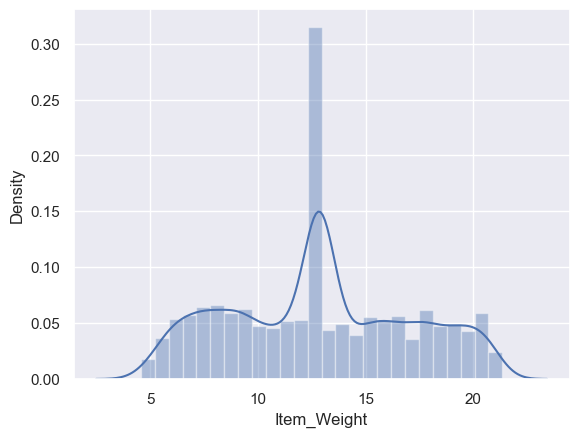

In [106]:
#plot for item weight distribution
plt.Figure(figsize=(6,6))
sns.distplot(df['Item_Weight'])
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6048\1404510901.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'])


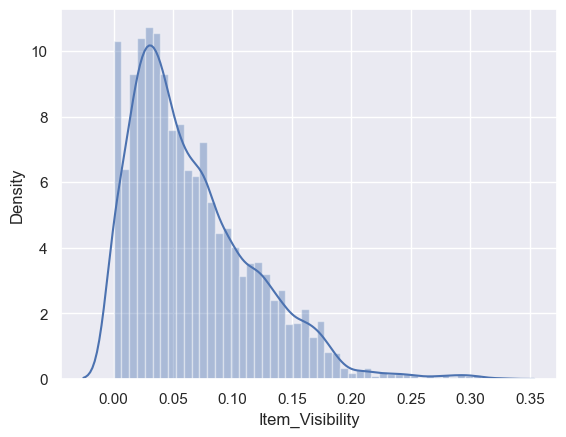

In [107]:
#plot for item visiblity distribution
plt.Figure(figsize=(6,6))
sns.distplot(df['Item_Visibility'])
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6048\3781070287.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


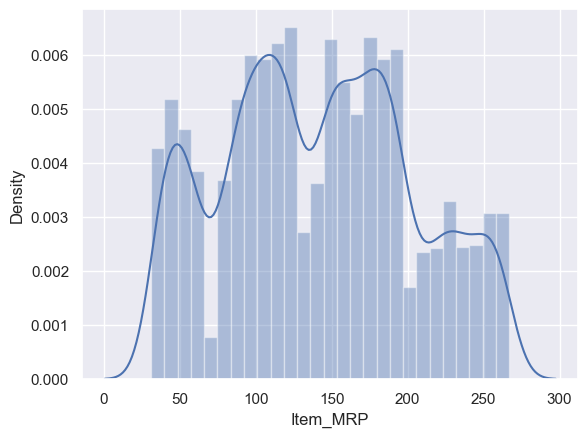

In [108]:
#plot for item mrp distribution
plt.Figure(figsize=(6,6))
sns.distplot(df['Item_MRP'])
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6048\3756511466.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


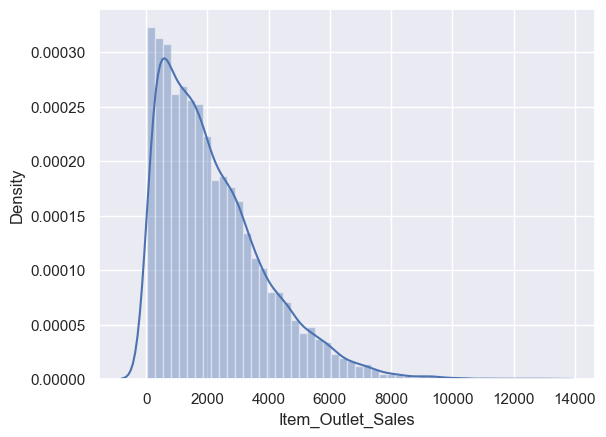

In [109]:
#plot for item outlet sales distribution
plt.Figure(figsize=(6,6))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

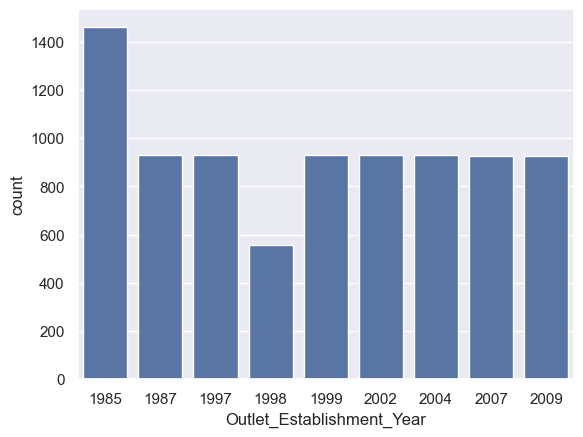

In [110]:
#plot for outlet establishment year
plt.Figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.show()

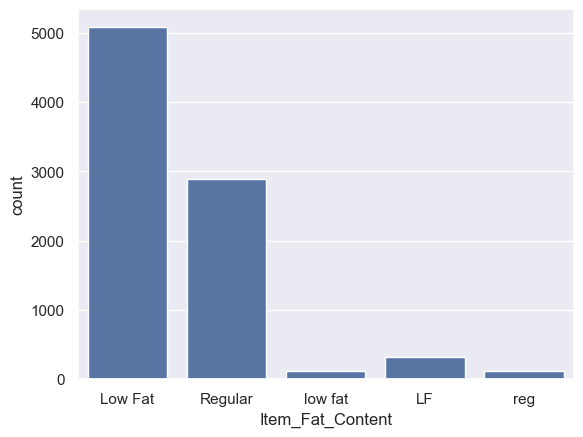

In [111]:
#plot for Item_Fat_Content
plt.Figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

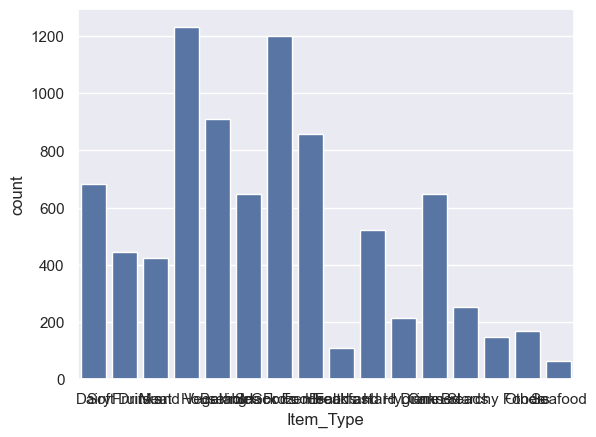

In [112]:
#plot for Item_Type
plt.Figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=df)
plt.show()

Data Preprocessing

In [113]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [114]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [115]:
df['Outlet_Size']

0                                                  Medium
1                                                  Medium
2                                                  Medium
3       Outlet_Type Grocery Store Supermarket Type1 Su...
4                                                    High
                              ...                        
8518                                                 High
8519    Outlet_Type Grocery Store Supermarket Type1 Su...
8520                                                Small
8521                                               Medium
8522                                                Small
Name: Outlet_Size, Length: 8523, dtype: object

In [116]:
df.replace({
    'Outlet_Type': {
        'Grocery Store': 'Small',
        'Supermarket Type1': 'Small',
        'Supermarket Type2': 'Medium',
        'Supermarket Type3': 'Medium'
    }
}, inplace=True)


Label Encoding

In [117]:
encoder=LabelEncoder()

In [118]:
df["Item_Identifier"]= encoder.fit_transform(df["Item_Identifier"])
df["Item_Fat_Content"]= encoder.fit_transform(df["Item_Fat_Content"])
df["Item_Type"]= encoder.fit_transform(df["Item_Type"])
df["Outlet_Identifier"]= encoder.fit_transform(df["Outlet_Identifier"])
df["Outlet_Location_Type"]= encoder.fit_transform(df["Outlet_Location_Type"])
df["Outlet_Type"]= encoder.fit_transform(df["Outlet_Type"])

In [119]:
type(df["Outlet_Size"])


pandas.core.series.Series

In [120]:
print(df["Outlet_Size"].head(10))
print(df["Outlet_Size"].apply(type).value_counts())


0                                               Medium
1                                               Medium
2                                               Medium
3    Outlet_Type Grocery Store Supermarket Type1 Su...
4                                                 High
5                                               Medium
6                                                 High
7                                               Medium
8    Outlet_Type Grocery Store Supermarket Type1 Su...
9    Outlet_Type Grocery Store Supermarket Type1 Su...
Name: Outlet_Size, dtype: object
Outlet_Size
<class 'str'>                            6113
<class 'pandas.core.frame.DataFrame'>    2410
Name: count, dtype: int64


In [121]:
df["Outlet_Size"] = df["Outlet_Size"].astype(str)
df["Outlet_Size"] = encoder.fit_transform(df["Outlet_Size"])


In [122]:
df['Outlet_Size']

0       1
1       1
2       1
3       2
4       0
       ..
8518    0
8519    2
8520    3
8521    1
8522    3
Name: Outlet_Size, Length: 8523, dtype: int64

In [123]:
print(df["Outlet_Size"].head(10))
print(df["Outlet_Size"].apply(type).value_counts())


0    1
1    1
2    1
3    2
4    0
5    1
6    0
7    1
8    2
9    2
Name: Outlet_Size, dtype: int64
Outlet_Size
<class 'int'>    8523
Name: count, dtype: int64


seperating features and target

In [124]:
X= df.drop(columns="Item_Outlet_Sales", axis=1)
Y= df['Item_Outlet_Sales']

In [125]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [126]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


data splitting

In [127]:
X_train,X_test,Y_train,Y_test= train_test_split(X ,Y ,test_size=0.2, random_state=2)

ML model training

In [128]:
regressor= XGBRegressor()

In [129]:
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Prediction

In [130]:
#prediction on training data
td_prediction=regressor.predict(X_train)

In [131]:
#r squared value
r2_train= metrics.r2_score(Y_train,td_prediction)

In [132]:
print("R squared value=", r2_train)

R squared value= 0.8731582700982132


In [133]:
#prediction on test data
testd_prediction=regressor.predict(X_test)

In [134]:
#r squared value
r2_test= metrics.r2_score(Y_test,testd_prediction)

In [135]:
print("R squared value=", r2_test)

R squared value= 0.5163248973736667


In [136]:
reg_alpha = 0.5
reg_lambda = 1.0


In [137]:
subsample=0.8
colsample_bytree=0.8


In [139]:
import xgboost as xgb  # Make sure this import is done

model = xgb.XGBRegressor(
    max_depth=3,
    learning_rate=0.05,
    n_estimators=1000,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.5,
    reg_lambda=1.0,
    random_state=42
)


In [141]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='r2')
print(scores)
print("Mean R2:", scores.mean())


[0.59836526 0.56931788 0.55761294 0.58447528 0.54556134]
Mean R2: 0.5710665388024234
